# Pymacueticals Inc.

### Statistical Summary
From a cusory exploration of the data, I have compiled a few findings on the treatments of mice and the size of their tumors. A glance at the summary statistics will show the treatments with the lowest mean tumor size were "Capomulin", "Ramicane", "Infubinol", and "Ceftamin". These also had low variences. For Capomulin, this low varience makes sense as it is the largest treatment group, containing over 200 mice, and larger sample sizes often yield lower variation. By comparing the four treatments that yeilded low means in a boxplot, one can see that Capomulin and Ramicane had lower means by far. However, I am not sure of the significance of this, and would need to do a ANOVA test on the means of each treatment to see for sure. 

A linear regression of weight vs. mean tumor size for mice on Capomulin showed that the variables were moderate-strongly correlated, with an r-value of .84. The r-squared would then be .7056, indicating that around 70.5% of the variation in average tumor volume can be explained by the regression of tumor volume on weight. 

A linear t test was performed with hypotheses: <br>
H0: beta = 0 <br>
Ha: beta =/= 0 <br>
With beta being the true population slope of weight vs. averge tumor volume 

A pvalue of <.001 was obtained, indicating that we will reject the null hypothesis. This means that there is sufficient evidence to suggest that the slope is not equal to 0, and therefore there is a correlation between weight and average tumor volume. 
(I didn't just look this up, I have a bachelor's in statistics :) )


In [1]:
# Dependencies and Setup
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = Path("Resources/Mouse_metadata.csv")
study_results_path = Path("Resources/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mice = pd.merge(mouse_metadata,study_results, on = "Mouse ID",how = "right")

# Display the data table for preview
merged_mice.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0
5,h246,Ketapril,Male,13,30,0,45.0,0
6,p189,Ketapril,Male,8,28,0,45.0,0
7,n923,Ketapril,Male,19,30,0,45.0,0
8,q119,Ketapril,Male,17,30,0,45.0,0
9,f993,Naftisol,Male,21,28,0,45.0,0


In [2]:
# Checking the number of mice
len(merged_mice["Mouse ID"].unique())

249

In [3]:
#find duplicate data points
double_mice = merged_mice[merged_mice.duplicated(['Mouse ID', 'Timepoint'])]
double_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.000000,0
360,g989,Propriva,Female,21,26,5,47.570392,0
681,g989,Propriva,Female,21,26,10,49.880528,0
869,g989,Propriva,Female,21,26,15,53.442020,0
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
#Remove duplicate data points 
clean_mice = merged_mice[merged_mice["Mouse ID"] != "g989"]
clean_mice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [5]:
#Check number of mice in clean data set 
len(clean_mice["Mouse ID"].unique())

248

## Summary Statistics 

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_mean = clean_mice.groupby(["Drug Regimen"]).mean(numeric_only = True)["Tumor Volume (mm3)"]
drug_med  = clean_mice.groupby(["Drug Regimen"]).median(numeric_only = True)["Tumor Volume (mm3)"]
drug_var  = clean_mice.groupby(["Drug Regimen"]).var(numeric_only = True)["Tumor Volume (mm3)"]
drug_sd   = clean_mice.groupby(["Drug Regimen"]).std(numeric_only = True)["Tumor Volume (mm3)"]
drug_sem  = clean_mice.groupby(["Drug Regimen"]).sem(numeric_only = True)["Tumor Volume (mm3)"]

drug_summary = pd.DataFrame({"Mean Tumor Volume": drug_mean, "Median Tumor Volume" : drug_med, 
                             "Tumor Volume Varience" : drug_var, "Tumor Volume Standard Deviation" : drug_sd, "Tumor Volume Std. Error" : drug_sem})

drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Varience,Tumor Volume Standard Deviation,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [111]:
#summarize with data aggregation
agg_tumor =  clean_mice.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_tumor

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

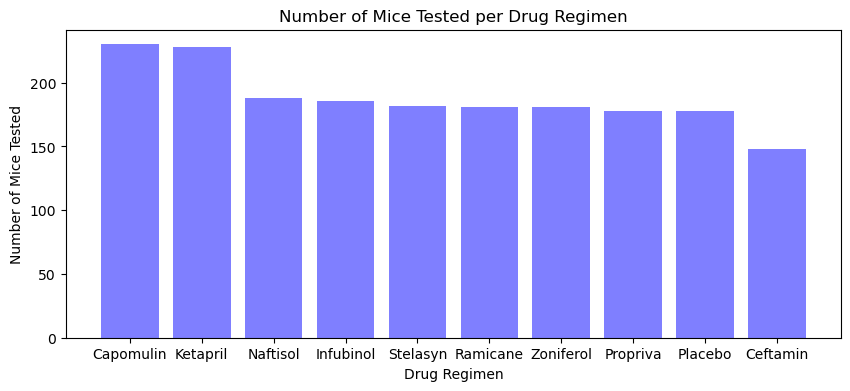

In [8]:
# Create a bar chart of drug regimens using matplotlib
mice_per_drug = clean_mice["Drug Regimen"].value_counts()
drugs = clean_mice["Drug Regimen"].unique()
plt.figure(figsize=(10,4))
plt.bar(drugs,mice_per_drug,color = "blue", alpha = .5)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Drug Regimen")
plt.show()


Text(0, 0.5, 'Number of Mice Tested')

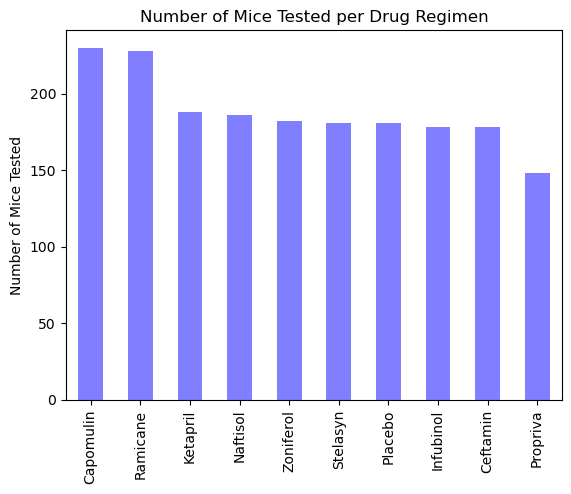

In [9]:
# Create a bar chart of drug regimens using pandas . plot 
mice_plot = mice_per_drug.plot(kind="bar", color = "blue", title = "Number of Mice Tested per Drug Regimen", alpha = .5)
mice_plot.set_ylabel("Number of Mice Tested")

<Axes: ylabel='Sex'>

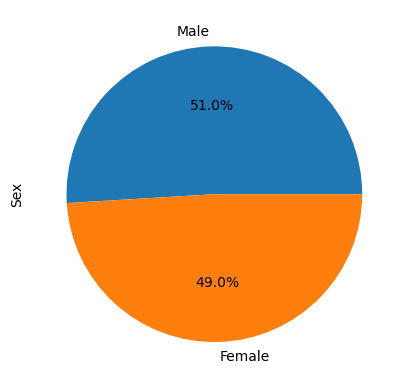

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas plot
mouse_sex = clean_mice["Sex"].value_counts()
mouse_sex.plot(kind= "pie",autopct='%1.1f%%')

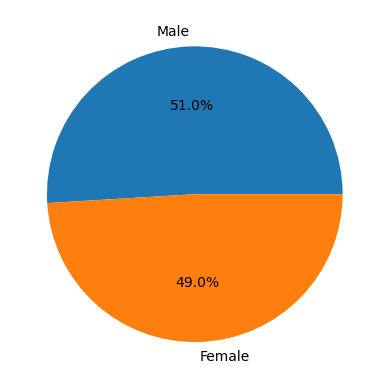

In [20]:
#doing the same thing with matplotlib.plt
plt.pie(mouse_sex,labels = ["Male", "Female"],autopct = '%1.1f%%')
plt.show()

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice.groupby("Mouse ID").max(numeric_only= True)["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_time_vol = pd.merge(clean_mice, last_timepoint, on = ["Mouse ID", "Timepoint"], how = "right")


In [106]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    final_tumor_vol = last_time_vol[last_time_vol["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_data.append(final_tumor_vol)
    IQR = final_tumor_vol.quantile(.75) - final_tumor_vol.quantile(.25)
    print(IQR)
    upper_bound = (final_tumor_vol.quantile(.75)) + (1.5*IQR)
    lower_bound = (final_tumor_vol.quantile(.25)) - (1.5*IQR)
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    outliers = (final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)])
    
   
   


7.781863460000004
9.098536719999998
11.477135160000003
15.577752179999997


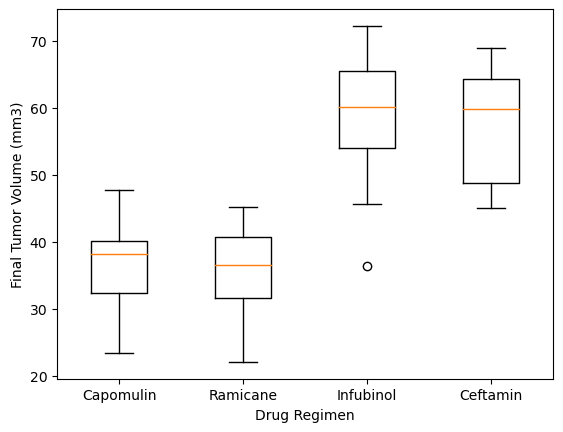

In [105]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_data,labels = treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

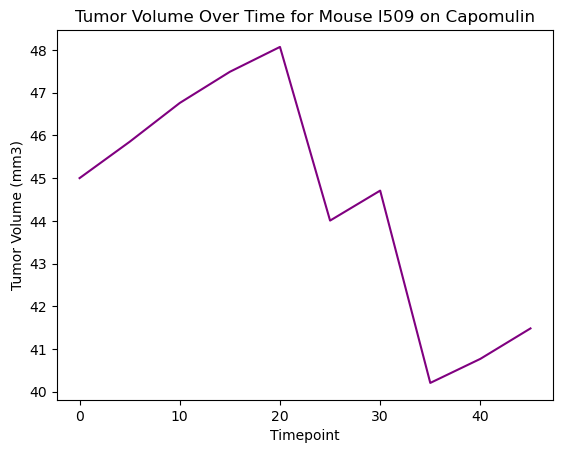

In [90]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
my_mouse = clean_mice.loc[clean_mice["Mouse ID"] == "l509", :]
my_mouse
plt.plot(my_mouse["Timepoint"], my_mouse["Tumor Volume (mm3)"], color = "purple")
plt.title("Tumor Volume Over Time for Mouse l509 on Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

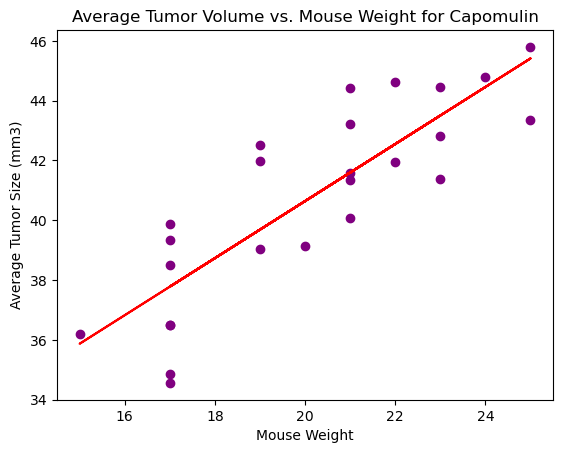

The correlation between mouse weight and tumor volume is 0.84


LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [112]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_avg = clean_mice.loc[clean_mice["Drug Regimen"] == "Capomulin"]
tumor_avg = capo_avg.groupby("Mouse ID").mean(numeric_only = True)

# Calculate the correlation coefficient and linear regression model
#for mouse weight and average tumor volume for the Capomulin regimen
lm = st.linregress(tumor_avg["Weight (g)"], tumor_avg["Tumor Volume (mm3)"])
slope = lm[0]
intercept = lm[1]
tumor_lsrl = tumor_avg["Weight (g)"]* slope + intercept

#format plot
plt.scatter(tumor_avg["Weight (g)"], tumor_avg["Tumor Volume (mm3)"], color = "purple")
plt.plot(tumor_avg["Weight (g)"], tumor_lsrl, color = "red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Size (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.show()
print(f"The correlation between mouse weight and tumor volume is {round(lm[2],2)}")